### The Problem statement:

The goal here is to find the chance of admission of a candidate based on his/her GRE Score (out of 340), TOEFL Score (out of 120), rating of the University (out of 5) in which he/she is trying to get admission, Strength of the SOP (out of 5),strength of the Letter Of Recommendation (out of 5), CGPA (out of 10) and the research experience (0 or 1).

In [8]:
# necessary Imports
import pandas as pd
import matplotlib.pyplot as plt
import pickle
% matpllotlib inline

UsageError: Line magic function `%` not found.


In [9]:
df= pd.read_csv('Admission_Prediction.csv')

In [10]:
df.head() # checking the first five rows from the dataset

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,4,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65


In [11]:
df.shape

(500, 9)

In [12]:
df.info() # printing the summary of the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
Serial No.           500 non-null int64
GRE Score            485 non-null float64
TOEFL Score          490 non-null float64
University Rating    485 non-null float64
SOP                  500 non-null float64
LOR                  500 non-null float64
CGPA                 500 non-null float64
Research             500 non-null int64
Chance of Admit      500 non-null float64
dtypes: float64(7), int64(2)
memory usage: 35.2 KB


In [191]:
df.isna().sum() # finding the count of missing values from different columns

In [13]:
df['GRE Score'].fillna(df['GRE Score'].mode()[0],inplace=True) 
#to replace the missing values in the 'GRE Score' column with the mode of the column
# Mode has been used here to replace the scores with the most occuring scores so that data follows the general trend

In [14]:
df['TOEFL Score'].fillna(df['TOEFL Score'].mode()[0],inplace=True)
#to replace the missing values in the 'GRE Score' column with the mode of the column
# Mode has been used here to replace the scores with the most occuring scores so that data follows the general trend

In [15]:
df['University Rating'].fillna(df['University Rating'].mean(),inplace=True)
#to replace the missing values in the 'University Rating' column with the mode of the column
# Mean has been used here to replace the scores with the average score

In [16]:
# dropping the 'Chance of Admit' and 'serial number' as they are not going to be used as features for prediction
x=df.drop(['Chance of Admit','Serial No.'],axis=1) 
# 'Chance of Admit' is the target column which shows the probability of admission for a candidate  
y=df['Chance of Admit']

In [17]:
x.head() # checking the transformed feature columns

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337.0,118.0,4.0,4.5,4.5,9.65,1
1,324.0,107.0,4.0,4.0,4.5,8.87,1
2,312.0,104.0,3.0,3.0,3.5,8.00,1
3,322.0,110.0,3.0,3.5,2.5,8.67,1
4,314.0,103.0,2.0,2.0,3.0,8.21,0


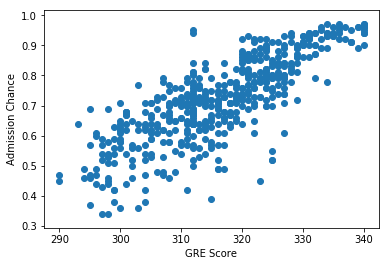

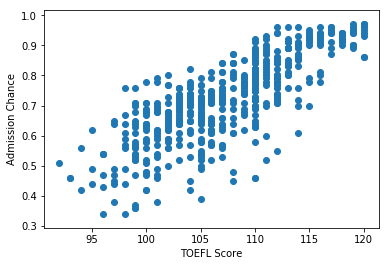

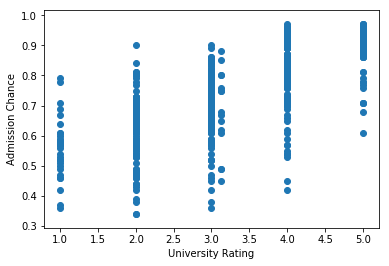

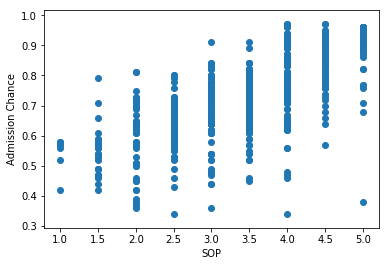

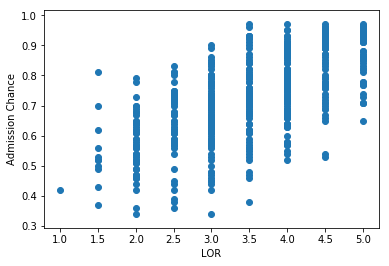

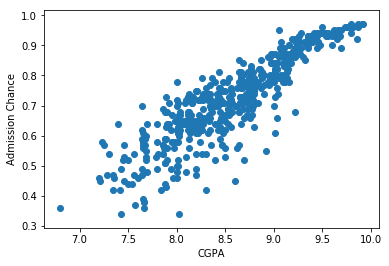

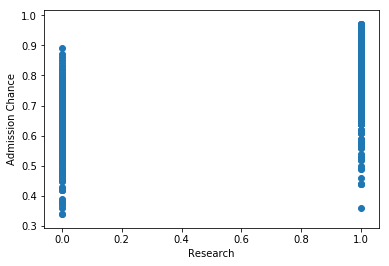

In [22]:
# showcasing the relationship between all the columns and the label
for col in x.columns:
    if(col != ['Chance of Admit']):
        plt.scatter(x[col],y)
        plt.xlabel(col)
        plt.ylabel('Admission Chance')
        plt.show()

In [23]:
# To be only used if you want to scale the data
"""from sklearn.preprocessing import StandardScaler
scaler_feature = StandardScaler()
scaler_label = StandardScaler()
scaled_data=scaler_feature.fit_transform(x)"""

'from sklearn.preprocessing import StandardScaler\nscaler_feature = StandardScaler()\nscaler_label = StandardScaler()\nscaled_data=scaler_feature.fit_transform(x)'

In [24]:
#scaled_data # Looking at the dataset after scaling

In [28]:
# splitting the data into training and testing sets
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.33, random_state=100)

In [29]:
# fitting the date to the Linear regression model
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(train_x, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [30]:
# calculataing the accuracy of the model
from sklearn.metrics import r2_score
score= r2_score(reg.predict(test_x),test_y)
score

0.8076993525686706

In [31]:
# saving the model to the local file system
filename = 'finalized_model.pickle'
pickle.dump(reg, open(filename, 'wb'))



In [215]:
loaded_model = pickle.load(open(filename, 'rb'))
a=loaded_model.predict(scaler_feature.transform([[300,110,5,5,5,10,1]]))
a

array([0.93409108])

In [216]:
scaler_test = StandardScaler()

In [32]:
# prediction using the saved model.
loaded_model = pickle.load(open(filename, 'rb'))
prediction=loaded_model.predict(([[320,120,5,5,5,10,1]]))
print(prediction[0])

0.9957821919825962


In [ ]:
scaler_feature.get_params(deep=True)